In [1]:
import pandas as pd
import numpy as np

In [2]:
X_2house = pd.read_csv('/wgdisk/ho0338/ek79/Tien/X_2house_v0.csv')
X_2house=X_2house.drop(columns=['Unnamed: 0'])
X_2house.index.rename('Order', inplace=True)

In [4]:
y_2house = np.load('y_2house.npy')

In [2]:
X_2house.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
Order,,,,,,,,,,,,,,,,,,,,,
1,20,4,141.0,31770,1,1,0,3,4,0,...,0,0,-1,4,0,0,5,2010,0,3
2,20,7,80.0,11622,1,1,3,3,4,4,...,120,0,-1,2,0,0,6,2010,0,3
3,20,4,81.0,14267,1,1,0,3,4,0,...,0,0,-1,4,1,12500,6,2010,0,3
4,20,4,93.0,11160,1,1,3,3,4,0,...,0,0,-1,4,0,0,4,2010,0,3
5,60,4,74.0,13830,1,1,0,3,4,4,...,0,0,-1,2,0,0,3,2010,0,3


## preparing the data input to ML 

In [5]:
print('dimension of X_2house:',X_2house.shape)
print('dimension of y_2House:',y_2house.shape)
print(X_2house.columns)

dimension of X_2house: (4290985, 158)
dimension of y_2House: (4290985,)
Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       ...
       'Screen Porch_2', 'Pool Area_2', 'Pool QC_2', 'Fence_2',
       'Misc Feature_2', 'Misc Val_2', 'Mo Sold_2', 'Yr Sold_2', 'Sale Type_2',
       'Sale Condition_2'],
      dtype='object', length=158)


### Set up the train-test split in sklearn

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_2house, y_2house, test_size=0.5, random_state=12)

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2145492, 158)
(2145492,)
(2145493, 158)
(2145493,)


In [13]:
print(type(X_train))
X_train.head(2)

<class 'pandas.core.frame.DataFrame'>


,Condition 2,Year Remod/Add,Exter Qual,Bsmt Unf SF,1st Flr SF,2nd Flr SF,Gr Liv Area,BsmtFin Type 2,Bsmt Unf SF,Full Bath,...,Bsmt Unf SF_2,Full Bath_2,Half Bath_2,Kitchen AbvGr_2,Garage Cond_2,Garage Cars_2,Wood Deck SF_2,Pool QC_2,Misc Feature_2,Sale Condition_2
221331,2.0,1992.0,4.0,1055.0,1055.0,790.0,1845.0,1.0,1055.0,2.0,...,356.0,2.0,0.0,1.0,3.0,2.0,240.0,-1.0,0.0,3.0
4201490,2.0,2005.0,3.0,600.0,520.0,600.0,1200.0,1.0,600.0,2.0,...,485.0,1.0,0.0,1.0,3.0,1.0,394.0,-1.0,0.0,3.0


In [14]:
print(y_train[0:2])

[ -3350.  34000.]


### Set up the Xgboost model

In [8]:
import xgboost as xgb
xgdmat=xgb.DMatrix(X_train,y_train)

In [10]:
my_params={'eta':0.1,'seed':12,'objective':'reg:linear','max_depth':4,'min_child_weight':2}

In [11]:
Gb_model0=xgb.train(my_params,xgdmat)

In [12]:
tesdmat=xgb.DMatrix(X_test)
y_pred_test_xgb=Gb_model0.predict(tesdmat)
traindmat=xgb.DMatrix(X_train)
y_pred_train_xgb=Gb_model0.predict(traindmat)

In [15]:
for i in range(len(y_pred_train_xgb)):
    if i < 10:
        print(y_pred_train_xgb[i],y_train[i])

16670.0 -3350.0
8327.7 34000.0
5916.85 65500.0
54674.3 106828.0
8919.17 -6700.0
25249.2 51500.0
23410.1 134000.0
79405.8 128500.0
26259.6 17500.0
-110547.0 -256000.0


In [16]:
# access several benchmark RMSE for reference:
from sklearn import metrics
print('R^2 score(training):',metrics.r2_score(y_train, y_pred_train_xgb))
print('R^2 score:',metrics.r2_score(y_test, y_pred_test_xgb))
print('MSE score(training):',metrics.mean_squared_error(y_train, y_pred_train_xgb))
print('MAE score(training):',metrics.mean_absolute_error(y_train, y_pred_train_xgb))
print('MSE score:',metrics.mean_squared_error(y_test, y_pred_test_xgb))
print('MAE score:',metrics.mean_absolute_error(y_test, y_pred_test_xgb))

R^2 score(training): 0.667448467031
R^2 score: 0.666813285464
MSE score(training): 4237513835.66
MAE score(training): 47651.7767376
MSE score: 4254232333.95
MAE score: 47730.0505931


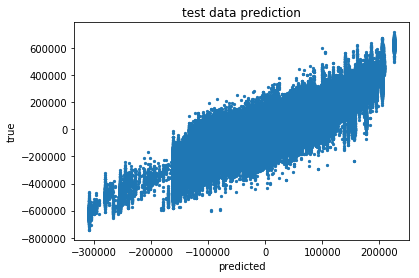

In [18]:
## Plotting the predicted price difference and the true price difference
import matplotlib.pyplot as plt
plt.scatter(y_pred_test_xgb,y_test, s=5)
plt.title('test data prediction')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()

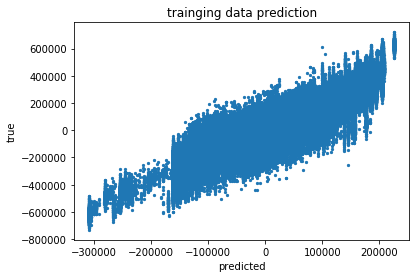

In [19]:
plt.scatter(y_pred_train_xgb,y_train, s=5)
plt.title('trainging data prediction')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()

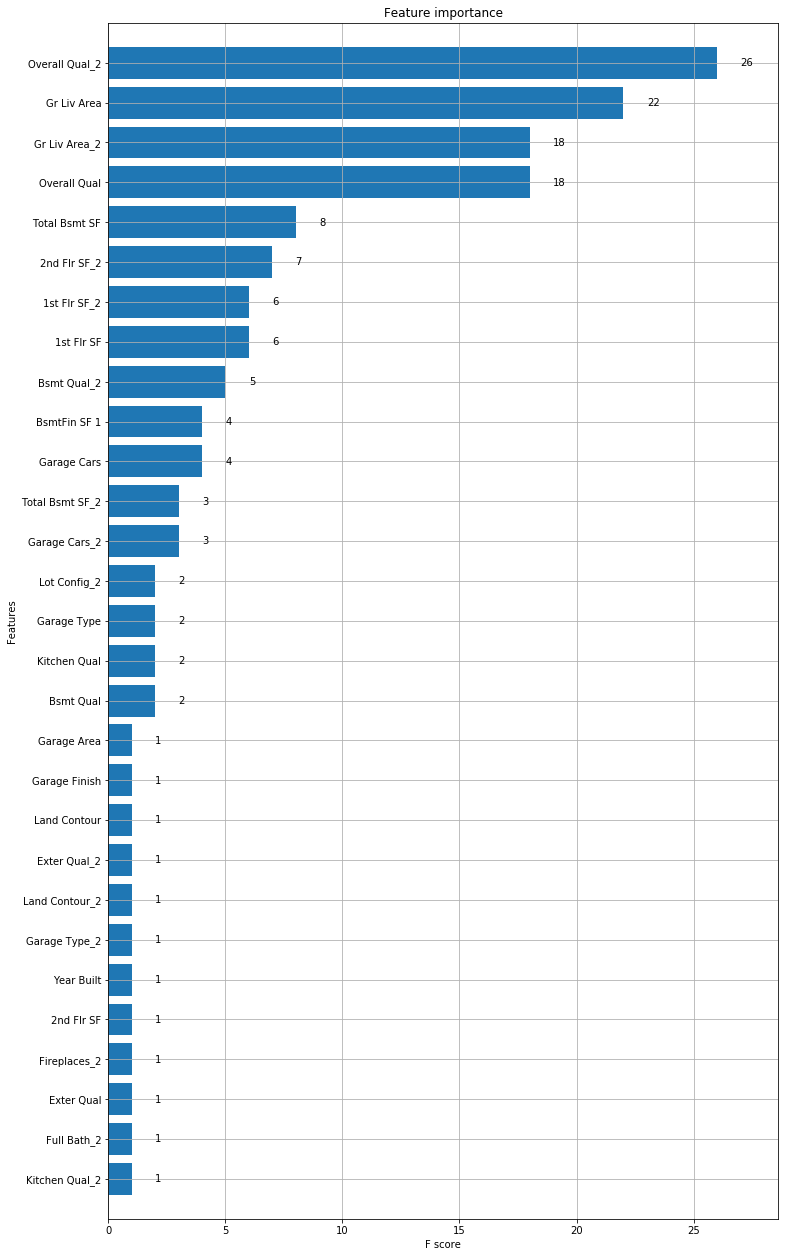

In [22]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(12,22))
xgb.plot_importance(Gb_model0, max_num_features=158, height=0.8, ax=ax)
plt.show()

## Try run a cross-validation to know the Xgboost model0 performance.

In [30]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=20)

### Need to experiment how to do CV on Xgboost

In [31]:
k_fold.get_n_splits(X_2house)
scores = np.sqrt(-1*cross_val_score(model01, X_2house, y_2house, cv=20,scoring = 'neg_mean_squared_error'))
print('Cross-validated scores:', scores)

Cross-validated scores: [ 54816.37871048  50050.13303078  48334.95767483  47273.9229382
  48223.77707341  66416.74240887  46188.07751116  47905.00087818
  48428.5180791   49057.69336363  50282.34274782  57824.68673314
  52405.051617    49184.78755441  49629.33399182  72043.1155636
  65274.30182619  47183.00414421  62881.14790242  51859.64103353]


In [32]:
print('Mean Cross-validation scores of MSE:',np.mean(scores))

Mean Cross-validation scores of MSE: 53263.1307391


In [38]:
from scipy import stats
stats.describe(scores)

DescribeResult(nobs=20, minmax=(46188.077511158765, 72043.115563603205), mean=53263.130739140171, variance=56831459.222560018, skewness=1.267815975506349, kurtosis=0.30801714300650707)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


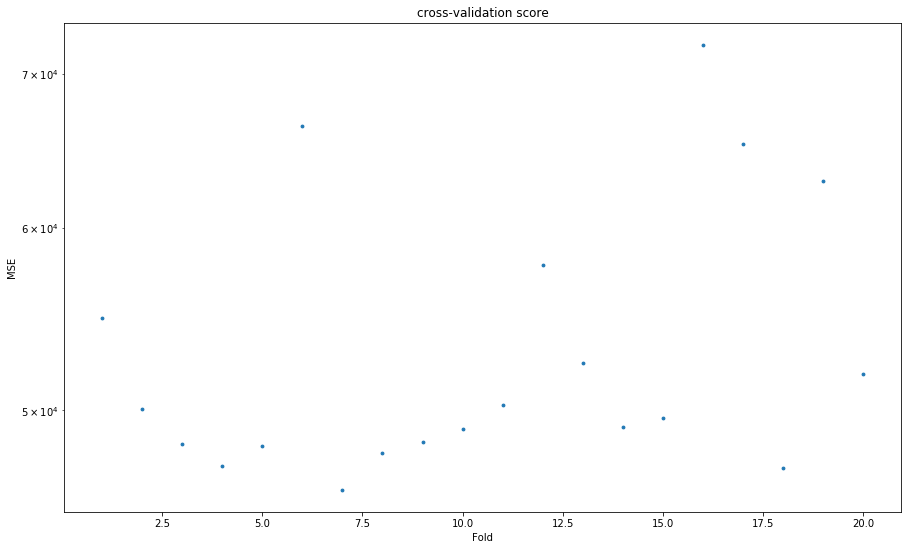

In [33]:
## Plot the variation of the cross-validation scores
stp=np.array([x for x in range(1,21)])
print(stp)
fig = plt.figure(figsize=(15,9))
ax = plt.gca()
ax.scatter(stp,scores,s=8)
ax.set_yscale('log')
plt.title('cross-validation score')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.show()